In [3]:
from sklearn.linear_model import LogisticRegression
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# Reading the dataset from the seaborn library 

In [13]:
# sns.load_dataset()=> this is the function  use to load the dataset using  seaborn  automatically 
data=sns.load_dataset("iris")

In [14]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
# to know the avaliable data set in the seaborn use this code and we can use this easily
sns.get_dataset_names()    

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [16]:
df=sns.load_dataset("diamonds")

In [17]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [18]:
# one technique 
x=data[['sepal_length','sepal_width','petal_length','petal_width']]
y=data.species

In [19]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
data['species'].unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [25]:
#Another method to select
x=data.drop('species',axis=1)
y=data.species

In [24]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [27]:
# train test split
xtrain, xtest,ytrain, ytest=train_test_split(x,y,test_size=0.2,random_state=16)

In [32]:
# Model fitting
model=LogisticRegression(multi_class='multinomial') # multiclass xa vanye chai multinominal use garna sakinxa
model.fit(xtrain,ytrain)

C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [34]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(
 |      penalty='l2',
 |      *,
 |      dual=False,
 |      tol=0.0001,
 |      C=1.0,
 |      fit_intercept=True,
 |      intercept_scaling=1,
 |      class_weight=None,
 |      random_state=None,
 |      solver='lbfgs',
 |      max_iter=100,
 |      multi_class='deprecated',
 |      verbose=0,
 |      warm_start=False,
 |      n_jobs=None,
 |      l1_ratio=None
 |  )
 |
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
 |  that regularization is applied by default**. It can handle both dense
 |  and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
 |  floats for opti

In [29]:
# sepal_length=6
#sepal_width=3
#petal_length=5
#petal_width=1

model.predict([[6,3,5,1]])

C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)

In [37]:
ypredection=model.predict(xtest)
ypredection

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa'],
      dtype=object)

In [38]:
# now accuracy 
accuracy=accuracy_score(ytest,ypredection)
print(f'Accuracy:{accuracy*100}')

Accuracy:90.0


In [39]:
precision=precision_score(ytest,ypredection)
print(f'Precision:{precision*100}')

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [41]:
cm=confusion_matrix(ytest,ypredection)

In [42]:
cm

array([[10,  0,  0],
       [ 0, 11,  1],
       [ 0,  2,  6]])

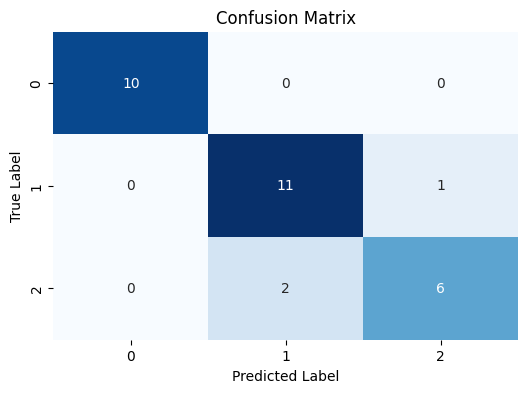

In [43]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False) # annote = true ko lekhye vanyo 93, 10 haru wala figure ma ayuxa
plt.xlabel('Predicted Label')                                   # yesle cbar mathi ko bar lai remove garxa  
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
            

In [ ]:
confusion matrix shape=nxn  , when n is the no of the class label

In [ ]:
# predicted lai chai column ma rakhidinxa
Diagonal ma vako numerical value chai correct predections  aru sabai incorrect predection

if the variable is catagoriacal then we use the technique of the encodeing garno parxa
just line gender we have to encode that 
encoding vanayako =>numeriacal ma convert garne
catagorial 
1. nominal=> order chaina (just like geneder, color male ,female ) is also called the one hot encoding

   
3. ordinal=>(order xa  just like Education level bachelor, masters, PHD )   is also called the label encoding(0->bechalor,
                                                                                                              (1->masters
 
                                                                                                               2->phd)

   

#  One hot encoding  of Gender


In [47]:
salary_data=pd.read_csv("Salary_Data.csv")

In [48]:
salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [49]:
salary_data=df

In [53]:
salary_data = pd.get_dummies(salary_data, columns=['Gender'], drop_first=True, dtype=int)


KeyError: "None of [Index(['Gender'], dtype='object')] are in the [columns]"

In [55]:
X=salary_data[['Age',	'Gender',	'Education Level',	'Job Title',	'Years of Experience']]	

KeyError: "None of [Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience'], dtype='object')] are in the [columns]"